# Customer Churn Prediction

- ##### In this part we will train a neural network that will predict weather a customer will leave a bank or not based on a banking data-set.
- ##### Our end goal here is not to train the best possible model, but to see how this thing is done so we can better understand how it works behind the scenes in the upcoming parts.
- ##### Here we will be using binary classification techique.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [137]:
df = pd.read_csv('./01. Churn_Modelling.csv')
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
print(df.shape)

(10000, 11)


In [3]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<br> 

### Checking For Null Values

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


<br>

### Checking For Duplicate Rows

In [33]:
print(df.duplicated().sum()) # 0 means no duplicate rows.

0


<br>

### Listing all categories of non numeric data

In [34]:
print(df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [35]:
print(df['Geography'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [8]:
print(df['Gender'].value_counts())

Gender
Male      5457
Female    4543
Name: count, dtype: int64


<br>

### Making all the categories saperate columns for training

In [138]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


<br>

### Splitting Data In Testing and Training Set

In [139]:
X, y = df.drop(columns=['Exited']), df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [12]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [39]:
X_train.shape, y_train.shape

((8000, 10), (8000,))

In [45]:
print(y_train.value_counts())

Exited
0    6378
1    1622
Name: count, dtype: int64


<br>

### Scaling Data For Better Results

In [140]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [8]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

<br>

### Model Training

In [141]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [143]:
model = Sequential()

model.add(Dense(16, activation='relu', input_dim = 11)) # 11 represents number of nodes in the layer
model.add(Dense(8, activation='relu'))  
model.add(Dense(4, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [144]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)               │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [146]:
history = model.fit(X_train_scaled, y_train, epochs=35, validation_split=0.2, batch_size = 128)

Epoch 1/35
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2276 - loss: 0.9274 - val_accuracy: 0.5544 - val_loss: 0.7073
Epoch 2/35
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6486 - loss: 0.6919 - val_accuracy: 0.7894 - val_loss: 0.6668
Epoch 3/35
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7865 - loss: 0.6640 - val_accuracy: 0.8144 - val_loss: 0.6516
Epoch 4/35
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8114 - loss: 0.6485 - val_accuracy: 0.8156 - val_loss: 0.6348
Epoch 5/35
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8102 - loss: 0.6291 - val_accuracy: 0.8156 - val_loss: 0.6019
Epoch 6/35
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8086 - loss: 0.5899 - val_accuracy: 0.8100 - val_loss: 0.5383
Epoch 7/35
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8094 - loss: 0.5196 - val_accuracy: 0.8112 - val_loss: 0.4820
Epoch 8/35
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8131 - loss: 0.4667 - val_accuracy: 0.8181 - val_loss

In [151]:
model.save('Customer Churn Prediction.keras')

In [ ]:
model.layers[0].get_weights()

In [ ]:
model.layers[1].get_weights()

In [ ]:
model.layers[2].get_weights()

In [131]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [147]:
y_pred = np.where(y_log > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.861

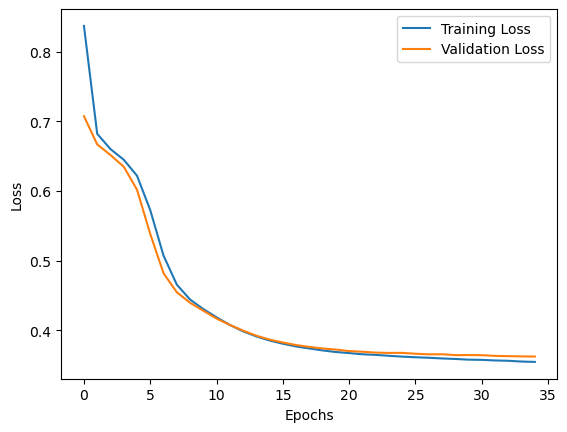

In [149]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

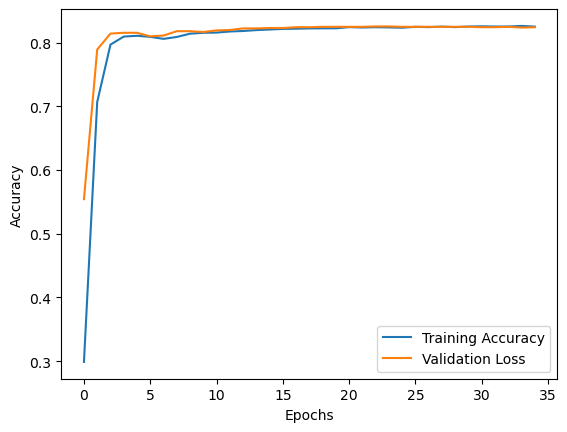

In [150]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()